In [158]:
"""
This exists to go through different options on the expected error on angles
"""

import numpy as np
import matplotlib.pyplot as plt
import control as ct

In this document we look at error propagation for a multitude of error injections
We consider a corner case, a side case and a zenith case. The susnsensor is assumed to be 90 deg rotationally invariant.
For the quad cell, we use the following:

\begin{align}
    S_a = \frac{\tan{\alpha}}{\tan{\alpha_{max}}} = \frac{Q_1+ Q_4 - Q_2 - Q_3 }{Q_1+ Q_2+ Q_3 + Q_4} \text{  (x-like)}\\
    S_b = \frac{\tan{\beta}}{\tan{\beta_{max}}} = \frac{Q_1+ Q_2 - Q_3 - Q_4}{Q_1+ Q_2+ Q_3 + Q_4} \text{  (y-like)}
\end{align}

From independent error analysis, we can deduce:
\begin{align}
    \sigma_{S_a} &= \frac{1}{Q_{tot}} \sqrt{(1 - S_a)^2(\sigma_{Q_1}^2 + \sigma_{Q_4}^2) + (1 + S_a)^2(\sigma_{Q_2}^2 +\sigma_{Q_3}^2)} \\
    \sigma_{S_b} &= \frac{1}{Q_{tot}} \sqrt{(1 - S_b)^2(\sigma_{Q_1}^2 + ^2\sigma_{Q_2}^2) + (1 + S_b)^2(\sigma_{Q_3}^2 +  \sigma_{Q_4}^2)}\\
\end{align}
Note that the calculations are done in voltages.
From which it is obvious that bias errors would be better analysed using a truth table.
We must convert the tangent, which we assume has a maximum of 90, to an angle. The error formula for this is not messy if you don't substitute all intermediate variables.
\begin{align}
\sigma_{\alpha} &= \delta_{S_a}(tan^{-1}S_a) \cdot \sigma_{S_a}\\
                &= \frac{1}{1 + S_a^2} \cdot \sigma_{S_a} [rad] = \frac{180}{\pi(1 + S_a^2)} \cdot \sigma_{S_a} [\degree]
\end{align}


In [159]:
def sun_tan_angles(Q1,e1,Q2,e2,Q3,e3,Q4,e4):
    Q_tot = Q1+Q2+Q3+Q4
    Sa = (Q1 + Q4 - Q2 - Q3)/Q_tot
    Sb = (Q1 + Q2 - Q3 - Q4)/Q_tot
    Sa_e = np.sqrt((1-Sa)**2 * (e1**2 +e4**2) + (1+ Sb)**2 * (e2**2 + e3**2))/Q_tot
    Sb_e = np.sqrt((1-Sb)**2 * (e1**2 +e2**2) + (1+ Sa)**2 * (e3**2 + e4**2))/Q_tot
    return Sa,Sb,Sa_e,Sb_e

def sun_angles(Sa,Sb,Sa_e,Sb_e):
    a, b = np.arctan(Sa)*180/np.pi, np.arctan(Sb)*180/np.pi
    a_e, b_e = 180/(np.pi *(1 + Sa**2)) * Sa_e , 180/(np.pi *(1 + Sb**2)) * Sb_e
    return a, b, a_e, b_e


#,constrained_layout=True
def single_side_plot(err1, err2, Errtota, Errtotb, title):
    fig = plt.figure(figsize=(10, 4))
    gs = fig.add_gridspec(1, 2, wspace=0.1)  # Reduce space between subplots
    ax1 = fig.add_subplot(gs[0,0], projection='3d')
    ax2 = fig.add_subplot(gs[0,1], projection='3d')
    fig.suptitle(title)
    # Plot the 3D surface
    ax1.plot_surface(err1, err2, Errtota, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.7,label = r"$\alpha$")
    ax1.view_init(elev=30, azim=200)
    ax1.set_xlabel('$\sigma_{Q_1}$')
    ax1.set_ylabel('$\sigma_{Q_2}$')
    ax1.set_zlabel(r'$\sigma_{\alpha}$ $\degree$')
    ax2.plot_surface(err1, err2, Errtotb, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,alpha=0.7, label = r"$\beta$")
    ax2.view_init(elev=30, azim=200)
    ax2.set_xlabel('$\sigma_{Q_1}$')
    ax2.set_ylabel('$\sigma_{Q_2}$')
    ax2.set_zlabel(r'$\sigma_{\beta}$ $\degree$')
    plt.subplots_adjust(top=0.88)  # Leaves room for the title
    ax1.dist = 12
    ax2.dist = 12
    #ax1.set_box_aspect(None, zoom=0.95)
    #ax2.set_box_aspect(None, zoom=0.95)
    plt.show()

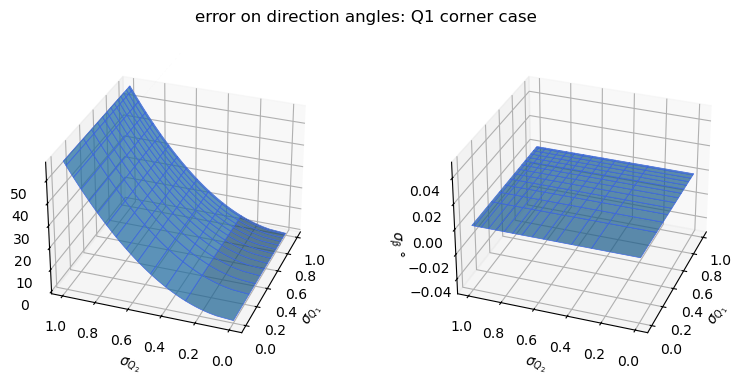

In [160]:
Q1 = np.arange(0,3.3,1e-3)
Q2 = Q1
Q3 = Q1
Q4 = Q1
qe1_error = np.arange(0,1,1e-2)
qe2_error = qe1_error
qe1_error, qe2_error = np.meshgrid(qe1_error, qe2_error)
#We start with a corner case
Sa,Sb,Sa_e,Sb_e = sun_tan_angles(Q1=1,e1=qe1_error,Q2=0,e2=qe2_error,Q3=0,e3=0,Q4=0,e4=0)
a, b, a_e, b_e = sun_angles(Sa,Sb,Sa_e,Sb_e)

single_side_plot(np.sqrt(qe1_error),np.sqrt(qe2_error),a_e,b_e, title = r"error on direction angles: Q1 corner case")

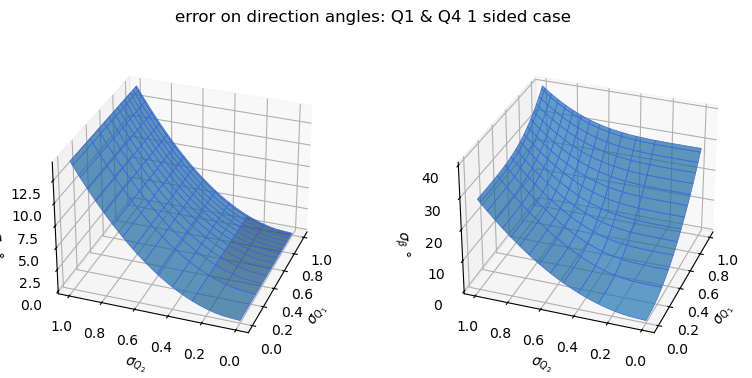

In [161]:
# Next is the side case pointing in te x direction
Sa,Sb,Sa_e,Sb_e = sun_tan_angles(Q1=1,e1=qe1_error,Q2=0,e2=qe2_error,Q3=0,e3=0,Q4=1,e4=0)
a, b, a_e, b_e = sun_angles(Sa,Sb,Sa_e,Sb_e)
single_side_plot(np.sqrt(qe1_error),np.sqrt(qe2_error),a_e,b_e, title = r"error on direction angles: Q1 & Q4 1 sided case")

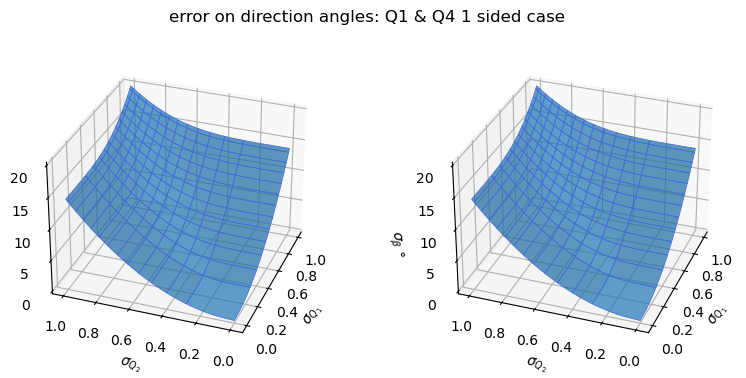

In [162]:
#lastly a zenith case
Sa,Sb,Sa_e,Sb_e = sun_tan_angles(Q1=1,e1=qe1_error,Q2=1,e2=qe2_error,Q3=1,e3=0,Q4=1,e4=0)
a, b, a_e, b_e = sun_angles(Sa,Sb,Sa_e,Sb_e)
single_side_plot(np.sqrt(qe1_error),np.sqrt(qe2_error),a_e,b_e,title = r"error on direction angles: Q1 & Q4 1 sided case")